In [2]:
import pandas as pd
import cobra as cb
from collections import Counter


# Figure settings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',
    font='Arial', font_scale=1,
    rc={'figure.figsize':(4,4)})
sns.set_palette('pastel')

plt.rcParams["figure.figsize"] = (4,4)

%matplotlib inline

In [3]:
# top deletions are obtained with mc_gettopdeletions
model = cb.io.load_json_model('/home/sg/wrk/s/matlab/modcell-hpc-study/cases/ecoli-native-matlab/input/parent-model-generation/iML1515.json')

df = pd.read_csv('./figures/a5_b1_topdeletions.csv')

design_param='a5_b1'

In [4]:
top_n = 20
def get_subsystem(rxn_id):
    return model.reactions.get_by_id(rxn_id).subsystem
df['subsystem'] = df['id'].map(get_subsystem)

In [5]:
usage = Counter(df.loc[0:top_n-1,'subsystem']).most_common()
labels = [x[0] for x in usage]
fraction = [x[1]/top_n for x in usage]

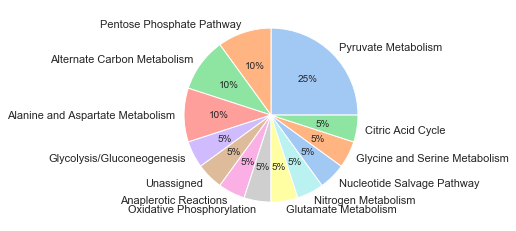

In [6]:
plt.pie(x=fraction,labels=labels, autopct='%1.0f%%');
plt.savefig(f'figures/{design_param}_top_deletions_pie.svgz')

# Deletion frequency

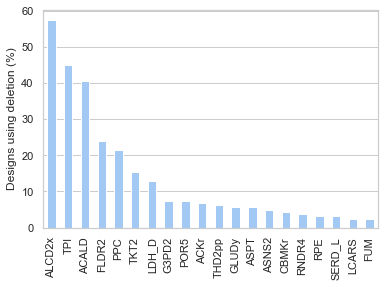

In [7]:
bar_top=19
df.loc[0:bar_top,'counts'].plot.bar()
ax = plt.gca()
ax.set_xticklabels(labels=list(df.loc[0:bar_top,'id']))
ax.grid(axis='x')
ax.set_ylabel('Designs using deletion (%)')
plt.savefig(f'figures/{design_param}_top_deletions_bar.svgz')

# Write escher

In [10]:
df.loc[0:top_n-1,['id','counts']].to_csv(f'figures/escher/{design_param}_top_escher_input.csv', index=False)